### Imports

In [1]:
import pickle
import operator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
from datetime import datetime
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, classification_report, precision_score, recall_score, accuracy_score, plot_roc_curve, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)


import warnings
warnings.filterwarnings("ignore")
import structlog


def logger():
    structlog.configure(processors=[structlog.processors.StackInfoRenderer(),
                                    structlog.processors.format_exc_info,
                                    structlog.processors.JSONRenderer()])
    return structlog.get_logger()

log = logger()
%matplotlib inline

In [2]:
train_set = pd.read_csv('Assignment_train_data.csv')
test_set = pd.read_csv('Assignment_test_data.csv')

In [3]:
train_set.head()

,ID,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14,var15,var16,var17,var18,var19,var20,var21,var22,var23,var24,var25,var26,var27,var28,var29,var30,var31,var32,var33,var34,var35,var36,var37,var38,var39,var40,var41,var42,var43,var44,var45,var46,var47,var48,var49,var50,var51,var52,var53,var54,var55,var56,var57,var58,var59,var60,var61,var62,var63,var64,var65,var66,var67,var68,var69,var70,var71,var72,var73,var74,var75,var76,var77,var78,var79,var80,var81,var82,var83,var84,var85,var86,var87,var88,var89,var90,var91,var92,var93,var94,var95,var96,var97,var98,var99,var100,var101,var102,var103,var104,var105,var106,var107,var108,var109,var110,var111,var112,var113,var114,var115,var116,var117,var118,var119,var120,var121,var122,var123,var124,var125,var126,var127,var128,var129,var130,var131,var132,var133,var134,var135,var136,var137,var138,var139,var140,var141,var142,var143,var144,var145,var146,var147,var148,var149,var150,var151,var152,var153,var154,var155,var156,var157,var158,var159,var160,var161,var162,var163,var164,var165,var166,var167,var168,var169,var170,var171,var172,var173,var174,var175,var176,var177,var178,var179,var180,var181,var182,var183,var184,var185,var186,var187,var188,var189,var190,var191,var192,var193,var194,var195,var196,var197,var198,var199,var200,var201,var202,var203,var204,var205,var206,var207,var208,var209,var210,var211,var212,var213,var214,var215,var216,var217,var218,var219,var220,var221,var222,var223,var224,var225,var226,var227,var228,var229,var230,var231,var232,var233,var234,var235,var236,var237,var238,var239,var240,var241,var242,var243,var244,var245,var246,var247,var248,var249,var250,var251,var252,var253,var254,var255,var256,var257,var258,var259,var260,var261,var262,var263,var264,var265,var266,var267,var268,var269,var270,var271,var272,var273,var274,var275,var276,var277,var278,var279,var280,var281,var282,var283,var284,var285,var286,var287,var288,var289,var290,var291,var292,var293,var294,var295,var296,var297,var298,var299,var300,var301,var302,var303,var304,var305,var306,var307,var308,var309,var310,var311,var312,var313,var314,var315,var316,var317,var318,var319,var320,var321,var322,var323,var324,var325,var326,var327,var328,var329,var330,var331,var332,var333,var334,var335,var336,var337,var338,var339,var340,var341,var342,var343,var344,var345,var346,var347,var348,var349,var350,var351,var352,var353,var354,var355,var356,var357,var358,var359,var360,var361,var362,var363,var364,var365,var366,var367,var368,var369,result
0,1,2,23,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,3,0,0,3,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0.000,0.000,0.000,0,0.000,0.000,0.000,0.000,0,0,0.000,0.000,0.000,0.000,0.000,0,0.000,0.000,0,0.000,0.000,0,99,0,0,0.000,0.000,0.000,0.000,0,0,0,0,0,0,0,0.000,0.000,0,0.000,0.000,0,0,0,0,0,0,0,0.000,0,0.000,0,0.000,0.000,0.000,0.000,0.000,0,0,0.000,0.000,0.000,0.000,0,0.000,0,0.000,0,0,0.000,0.000,0.000,0.000,0,0.000,0.000,0.000,0,0,0.000,0.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,39205.170,0
1,3,2,34,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,3,0,0,0,0,0,0,0,3,3,3,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [4]:
test_set.head()

,ID,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14,var15,var16,var17,var18,var19,var20,var21,var22,var23,var24,var25,var26,var27,var28,var29,var30,var31,var32,var33,var34,var35,var36,var37,var38,var39,var40,var41,var42,var43,var44,var45,var46,var47,var48,var49,var50,var51,var52,var53,var54,var55,var56,var57,var58,var59,var60,var61,var62,var63,var64,var65,var66,var67,var68,var69,var70,var71,var72,var73,var74,var75,var76,var77,var78,var79,var80,var81,var82,var83,var84,var85,var86,var87,var88,var89,var90,var91,var92,var93,var94,var95,var96,var97,var98,var99,var100,var101,var102,var103,var104,var105,var106,var107,var108,var109,var110,var111,var112,var113,var114,var115,var116,var117,var118,var119,var120,var121,var122,var123,var124,var125,var126,var127,var128,var129,var130,var131,var132,var133,var134,var135,var136,var137,var138,var139,var140,var141,var142,var143,var144,var145,var146,var147,var148,var149,var150,var151,var152,var153,var154,var155,var156,var157,var158,var159,var160,var161,var162,var163,var164,var165,var166,var167,var168,var169,var170,var171,var172,var173,var174,var175,var176,var177,var178,var179,var180,var181,var182,var183,var184,var185,var186,var187,var188,var189,var190,var191,var192,var193,var194,var195,var196,var197,var198,var199,var200,var201,var202,var203,var204,var205,var206,var207,var208,var209,var210,var211,var212,var213,var214,var215,var216,var217,var218,var219,var220,var221,var222,var223,var224,var225,var226,var227,var228,var229,var230,var231,var232,var233,var234,var235,var236,var237,var238,var239,var240,var241,var242,var243,var244,var245,var246,var247,var248,var249,var250,var251,var252,var253,var254,var255,var256,var257,var258,var259,var260,var261,var262,var263,var264,var265,var266,var267,var268,var269,var270,var271,var272,var273,var274,var275,var276,var277,var278,var279,var280,var281,var282,var283,var284,var285,var286,var287,var288,var289,var290,var291,var292,var293,var294,var295,var296,var297,var298,var299,var300,var301,var302,var303,var304,var305,var306,var307,var308,var309,var310,var311,var312,var313,var314,var315,var316,var317,var318,var319,var320,var321,var322,var323,var324,var325,var326,var327,var328,var329,var330,var331,var332,var333,var334,var335,var336,var337,var338,var339,var340,var341,var342,var343,var344,var345,var346,var347,var348,var349,var350,var351,var352,var353,var354,var355,var356,var357,var358,var359,var360,var361,var362,var363,var364,var365,var366,var367,var368,var369
0,119773,2,61,0.000,0.000,0.000,0.000,0.000,0,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,3,0,0,3,0,0,0,0,0,0.000,0.000,0,0.000,0.000,0.000,0.000,0,0.000,0.000,0.000,0,0.000,0.000,0.000,0.000,0,0,0,0.000,0.000,0.000,0.000,0,0.000,0.000,0,0.000,0.000,0,99,0,0,0.000,0.000,0.000,0,0,0,0,0,0,0,0,0,0,0.000,0,0,0,0,0,0,0,0,0,0,0,0.000,0,0.000,0.000,0.000,0,0.000,0,0,0,0.000,0.000,0.000,0,0,0.000,0.000,0,0,0.000,0.000,0,0.000,0,0.000,0.000,0,0,0,0,0.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,3,6,0,6,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,9,6,18,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0.000,0.000,0.000,0.000,0.000,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,152816.220
1,119774,2,34,0.000,0.000,0.000,0.000,0.000,0,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,3,3,0,0,0,0,0.000,

### Assuming Result variable to be Churn. This shows churn percent to be around 3.8%

In [5]:
train_set.result.value_counts(normalize=True)*100

0   96.137
1    3.863
Name: result, dtype: float64

# Featuer Cleaning / Engineering

### Removing featuers with less than 75% fill rate

> Result: Nothing to be dropped

In [6]:
fill_rate = train_set.isna().sum().reset_index().rename(columns={'index': 'columns', 0: 'fill_rate'})
fill_rate['fill_rate'] = (100 * fill_rate['fill_rate'] / len(train_set))
fill_rate = fill_rate[fill_rate.fill_rate < 75]

In [7]:
len(fill_rate)

371

In [8]:
train_set = train_set.iloc[:, train_set.columns.isin(fill_rate['columns'].tolist())]

In [9]:
columns_with_empty_rows = []
for col in train_set.drop(columns=['ID', 'result']).columns:
    if len(train_set[train_set[col] == '']) > 0:
        columns_with_empty_rows.append(col)

In [10]:
columns_with_empty_rows

[]

### Checking data types

> Result: All numeric variables

In [11]:
numeric = train_set.drop(columns=['ID', 'result']).select_dtypes(include=[np.float, np.int])
numeric.shape

(60000, 369)

In [12]:
non_numeric = train_set.drop(columns=['ID', 'result']).select_dtypes(exclude=[np.number])
non_numeric.shape

(60000, 0)

In [13]:
train_set.drop(columns=['ID']).describe()

,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14,var15,var16,var17,var18,var19,var20,var21,var22,var23,var24,var25,var26,var27,var28,var29,var30,var31,var32,var33,var34,var35,var36,var37,var38,var39,var40,var41,var42,var43,var44,var45,var46,var47,var48,var49,var50,var51,var52,var53,var54,var55,var56,var57,var58,var59,var60,var61,var62,var63,var64,var65,var66,var67,var68,var69,var70,var71,var72,var73,var74,var75,var76,var77,var78,var79,var80,var81,var82,var83,var84,var85,var86,var87,var88,var89,var90,var91,var92,var93,var94,var95,var96,var97,var98,var99,var100,var101,var102,var103,var104,var105,var106,var107,var108,var109,var110,var111,var112,var113,var114,var115,var116,var117,var118,var119,var120,var121,var122,var123,var124,var125,var126,var127,var128,var129,var130,var131,var132,var133,var134,var135,var136,var137,var138,var139,var140,var141,var142,var143,var144,var145,var146,var147,var148,var149,var150,var151,var152,var153,var154,var155,var156,var157,var158,var159,var160,var161,var162,var163,var164,var165,var166,var167,var168,var169,var170,var171,var172,var173,var174,var175,var176,var177,var178,var179,var180,var181,var182,var183,var184,var185,var186,var187,var188,var189,var190,var191,var192,var193,var194,var195,var196,var197,var198,var199,var200,var201,var202,var203,var204,var205,var206,var207,var208,var209,var210,var211,var212,var213,var214,var215,var216,var217,var218,var219,var220,var221,var222,var223,var224,var225,var226,var227,var228,var229,var230,var231,var232,var233,var234,var235,var236,var237,var238,var239,var240,var241,var242,var243,var244,var245,var246,var247,var248,var249,var250,var251,var252,var253,var254,var255,var256,var257,var258,var259,var260,var261,var262,var263,var264,var265,var266,var267,var268,var269,var270,var271,var272,var273,var274,var275,var276,var277,var278,var279,var280,var281,var282,var283,var284,var285,var286,var287,var288,var289,var290,var291,var292,var293,var294,var295,var296,var297,var298,var299,var300,var301,var302,var303,var304,var305,var306,var307,var308,var309,var310,var311,var312,var313,var314,var315,var316,var317,var318,var319,var320,var321,var322,var323,var324,var325,var326,var327,var328,var329,var330,var331,var332,var333,var334,var335,var336,var337,var338,var339,var340,var341,var342,var343,var344,var345,var346,var347,var348,var349,var350,var351,var352,var353,var354,var355,var356,var357,var358,var359,var360,var361,var362,var363,var364,var365,var366,var367,var368,var369,result
count,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,6

<AxesSubplot:xlabel='result', ylabel='Density'>

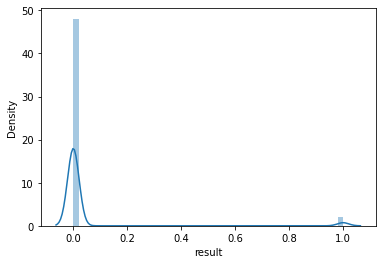

In [14]:
sns.distplot(train_set.result)

# Feature selection

1. Weight of evidences based selection.

> 308 out of 369 features deemed unusable. 61 features remain.

> Features with IV value > 0.5 are too good to be true. Could have leakage or other problems. Should be dropped.

> Features with IV value < 0.02 are not valuable. Very weak predictors of target variable. Should be dropped.

2. Correlation Test

> High multicollinearity seen amongst features.

> No features seem to have high correlation with target variable result.

### WOE / IV

In [15]:
import pandas as pd
import numpy as np
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import string

max_bin = 20
force_bin = 3

def mono_bin(Y, X, n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def find_woe_and_iv(data, target, final='delinquent'):
    columns = data.columns
    count = -1
    
    for col in columns:
        if col.upper() not in (final.upper()):
            if np.issubdtype(data[col], np.number) and len(Series.unique(data[col])) > 2:
                temp = mono_bin(target, data[col])
                temp["VAR_NAME"] = col
                count = count + 1
            else:
                temp = char_bin(target, data[col])
                temp["VAR_NAME"] = col          
                count = count + 1
                
            if count == 0:
                iv_df = temp
            else:
                iv_df = iv_df.append(temp, ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv)

In [16]:
cols = train_set.drop(columns=['ID', 'result']).columns
woe_scores, IV = find_woe_and_iv(train_set[cols], train_set.result, 'result')
IV.sort_values('IV', ascending=False).head()

,VAR_NAME,IV
111,var2,0.732
330,var64,0.474
258,var331,0.469
202,var281,0.455
259,var332,0.452


In [17]:
len(cols)

369

In [18]:
cols_to_be_dropped = IV[(IV['IV'] > 0.5) | (IV['IV'] < 0.02)].VAR_NAME.values.tolist()

len(cols_to_be_dropped)

308

In [19]:
100*(len(cols_to_be_dropped) / len(cols))

83.46883468834689

In [20]:
remaining_cols = list(set(cols) - set(cols_to_be_dropped))
remaining_cols = remaining_cols + ['ID']

In [21]:
train_set = train_set.loc[:, remaining_cols + ['result']]
test_set = test_set.loc[:, remaining_cols]

In [22]:
train_set.shape, test_set.shape

((60000, 63), (16020, 62))

### Correlation Test

In [23]:
corr_matrix = train_set.drop(columns=['ID']).corr()

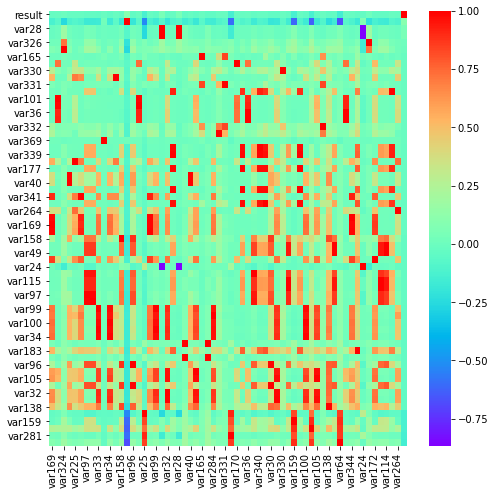

In [24]:
f, ax = plt.subplots(figsize =(8, 8)) 
sns.heatmap(corr_matrix.sort_values('result',ascending=False), ax = ax, cmap ="rainbow") 
plt.show()

In [25]:
corr_matrix[['result']].sort_values('result',ascending=False).head()

,result
result,1.000
var194,0.101
var28,0.045
var94,0.045
var326,0.008


In [26]:
corr_matrix[['result']].sort_values('result',ascending=False).tail()

,result
var25,-0.131
var159,-0.131
var139,-0.134
var281,-0.144
var64,-0.145


### Multicollinearity Tests

In [27]:
threshold = 0.9

corr_matrix = train_set.drop(columns=['ID']).corr().abs()
corr_matrix.head()

,var169,var101,var324,var106,var225,var341,var97,var31,var33,var369,var34,var342,var158,var194,var96,var102,var25,var343,var99,var94,var32,var339,var28,var77,var40,var98,var165,var80,var284,var329,var331,var281,var170,var177,var36,var283,var340,var191,var30,var39,var330,var115,var159,var168,var100,var139,var105,var332,var138,var49,var64,var35,var344,var183,var24,var326,var172,var50,var114,var337,var264,result
var169,1.000,0.002,0.068,0.373,0.557,0.898,0.031,0.030,0.722,0.017,0.735,0.522,0.209,0.124,0.225,0.002,0.032,0.989,0.720,0.016,0.653,0.008,0.016,0.051,0.377,0.602,0.006,0.051,0.703,0.233,0.059,0.024,0.003,0.009,0.003,0.023,0.008,0.011,0.232,0.661,0.276,0.011,0.022,0.010,0.735,0.248,0.622,0.180,0.491,0.017,0.092,0.004,0.981,0.529,0.018,0.011,0.861,0.011,0.016,0.009,0.355,0.027
var101,0.002,1.000,0.045,0.036,0.260,0.005,0.038,0.024,0.018,0.010,0.010,0.004,0.005,0.074,0.037,0.979,0.014,0.003,0.018,0.001,0.391,0.005,0.001,0.001,0.024,0.551,0.006,0.001,0.017,0.074,0.022,0.010,0.728,0.005,0.909,0.024,0.005,0.007,0.027,0.394,0.086,0.023,0.004,0.005,0.010,0.230,0.525,0.063,0.324,0.023,0.055,0.913,0.002,0.230,0.044,0.022,0.372,0.023,0.023,0.005,0.357,0.017
var324,0.068,0.045,1.000,0.101,0.008,0.048,0.192,0.190,0.109,0.001,0.106,0.006,0.177,0.254,0.185,0.046,0.067,0.068,0.109,0.174,0.117,0.096,0.173,0.115,0.100,0.115,0.052,0.112,0.094,0.089,0.060,0.105,0.026,0.095,0.043,0.173,0.094,0.108,0.183,0.114,0.036,0.175,0.206,0.096,0.106,0.241,0.114,0.074,0.186,0.172,0.180,0.043,0.067,0.128,0.154,0.719,0.071,0.176,0.171,0.070,0.022,0.001
var106,0.373,0.036,0.101,1.000,0.252,0.374,0.202,0.184,0.532,0.004,0.522,0.239,0.564,0.120,0.604,0.037,0.027,0.376,0.531,0.011,0.489,0.025,0.011,0.053,0.995,0.462,0.029,0.053,0.536,0.087,0.044,0.020,0.011,0.018,0.025,0.152,0.024,0.032,0.573,0.480,0.105,0.042,0.066,0.027,0.522,0.259,0.461,0.081,0.649,0.040,0.090,0.026,0.376,0.223,0.004,0.057,0.326,0.042,0.040,0.020,0.312,0.022
var225,0.557,0.260,0.008,0.252,1.000,0.701,0.027,0.026,0.401,0.015,0.397,0.708,0.124,0.090,0.155,0.262,0.033,0.573,0.398,0.009,0.479,0.018,0.009,0.016,0.254,0.472,0.005,0.016,0.505,0.010,0.012,0.001,0.327,0.017,0.281,0.030,0.017,0.018,0.159,0.478,0.296,0.014,0.023,0.018,0.397,0.183,0.474,0.082,0.358,0.015,0.067,0.280,0.540,0.404,0.018,0.004,0.645,0.014,0.015,0.023,0.734,0.021


In [28]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper.head()

,var169,var101,var324,var106,var225,var341,var97,var31,var33,var369,var34,var342,var158,var194,var96,var102,var25,var343,var99,var94,var32,var339,var28,var77,var40,var98,var165,var80,var284,var329,var331,var281,var170,var177,var36,var283,var340,var191,var30,var39,var330,var115,var159,var168,var100,var139,var105,var332,var138,var49,var64,var35,var344,var183,var24,var326,var172,var50,var114,var337,var264,result
var169,NaN,0.002,0.068,0.373,0.557,0.898,0.031,0.030,0.722,0.017,0.735,0.522,0.209,0.124,0.225,0.002,0.032,0.989,0.720,0.016,0.653,0.008,0.016,0.051,0.377,0.602,0.006,0.051,0.703,0.233,0.059,0.024,0.003,0.009,0.003,0.023,0.008,0.011,0.232,0.661,0.276,0.011,0.022,0.010,0.735,0.248,0.622,0.180,0.491,0.017,0.092,0.004,0.981,0.529,0.018,0.011,0.861,0.011,0.016,0.009,0.355,0.027
var101,NaN,NaN,0.045,0.036,0.260,0.005,0.038,0.024,0.018,0.010,0.010,0.004,0.005,0.074,0.037,0.979,0.014,0.003,0.018,0.001,0.391,0.005,0.001,0.001,0.024,0.551,0.006,0.001,0.017,0.074,0.022,0.010,0.728,0.005,0.909,0.024,0.005,0.007,0.027,0.394,0.086,0.023,0.004,0.005,0.010,0.230,0.525,0.063,0.324,0.023,0.055,0.913,0.002,0.230,0.044,0.022,0.372,0.023,0.023,0.005,0.357,0.017
var324,NaN,NaN,NaN,0.101,0.008,0.048,0.192,0.190,0.109,0.001,0.106,0.006,0.177,0.254,0.185,0.046,0.067,0.068,0.109,0.174,0.117,0.096,0.173,0.115,0.100,0.115,0.052,0.112,0.094,0.089,0.060,0.105,0.026,0.095,0.043,0.173,0.094,0.108,0.183,0.114,0.036,0.175,0.206,0.096,0.106,0.241,0.114,0.074,0.186,0.172,0.180,0.043,0.067,0.128,0.154,0.719,0.071,0.176,0.171,0.070,0.022,0.001
var106,NaN,NaN,NaN,NaN,0.252,0.374,0.202,0.184,0.532,0.004,0.522,0.239,0.564,0.120,0.604,0.037,0.027,0.376,0.531,0.011,0.489,0.025,0.011,0.053,0.995,0.462,0.029,0.053,0.536,0.087,0.044,0.020,0.011,0.018,0.025,0.152,0.024,0.032,0.573,0.480,0.105,0.042,0.066,0.027,0.522,0.259,0.461,0.081,0.649,0.040,0.090,0.026,0.376,0.223,0.004,0.057,0.326,0.042,0.040,0.020,0.312,0.022
var225,NaN,NaN,NaN,NaN,NaN,0.701,0.027,0.026,0.401,0.015,0.397,0.708,0.124,0.090,0.155,0.262,0.033,0.573,0.398,0.009,0.479,0.018,0.009,0.016,0.254,0.472,0.005,0.016,0.505,0.010,0.012,0.001,0.327,0.017,0.281,0.030,0.017,0.018,0.159,0.478,0.296,0.014,0.023,0.018,0.397,0.183,0.474,0.082,0.358,0.015,0.067,0.280,0.540,0.404,0.018,0.004,0.645,0.014,0.015,0.023,0.734,0.021


In [29]:
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print(f'There are {len(to_drop)} columns to remove.')

There are 29 columns to remove.


In [30]:
train_set = train_set.drop(columns = to_drop)
test_set = test_set.drop(columns = to_drop)

print(f'Training shape: {train_set.shape}')
print(f'Testing shape: {test_set.shape}')


Training shape: (60000, 34)
Testing shape: (16020, 33)


### Feature Selection through Feature Importances

In [31]:
feature_importances = np.zeros(train_set.drop(columns = ['ID', 'result']).shape[1])

model = lgb.LGBMClassifier(objective='binary', boosting_type = 'goss', n_estimators = 10000, class_weight = 'balanced')

In [32]:
for i in range(2):
    train_features, valid_features, train_y, valid_y = train_test_split(train_set.drop(columns = ['ID', 'result']), train_set[['result']], test_size = 0.25, random_state = i)
    
    model.fit(train_features, train_y, early_stopping_rounds=2000, eval_set = [(valid_features, valid_y)], eval_metric = 'auc', verbose = 200)
    
    feature_importances += model.feature_importances_

Training until validation scores don't improve for 2000 rounds
[200]	valid_0's auc: 0.729873	valid_0's binary_logloss: 0.449109
[400]	valid_0's auc: 0.717135	valid_0's binary_logloss: 0.407027
[600]	valid_0's auc: 0.709842	valid_0's binary_logloss: 0.386856
[800]	valid_0's auc: 0.706148	valid_0's binary_logloss: 0.376363
[1000]	valid_0's auc: 0.703905	valid_0's binary_logloss: 0.373959
[1200]	valid_0's auc: 0.701072	valid_0's binary_logloss: 0.371889
[1400]	valid_0's auc: 0.699572	valid_0's binary_logloss: 0.371683
[1600]	valid_0's auc: 0.697819	valid_0's binary_logloss: 0.374255
[1800]	valid_0's auc: 0.696516	valid_0's binary_logloss: 0.375434
[2000]	valid_0's auc: 0.696163	valid_0's binary_logloss: 0.378743
Early stopping, best iteration is:
[26]	valid_0's auc: 0.759572	valid_0's binary_logloss: 0.554605
Training until validation scores don't improve for 2000 rounds
[200]	valid_0's auc: 0.732382	valid_0's binary_logloss: 0.454361
[400]	valid_0's auc: 0.719197	valid_0's binary_logloss

In [33]:
feature_importances = feature_importances / 2
feature_importances = pd.DataFrame({'feature': list(train_set.drop(columns = ['ID', 'result']).columns), 'importance': feature_importances}).sort_values('importance', ascending = False)

feature_importances.head()

,feature,importance
8,var369,126.500
27,var183,102.500
21,var330,87.500
18,var329,58.000
19,var331,56.000


In [34]:
zero_features = list(feature_importances[feature_importances['importance'] == 0.0]['feature'])
print('There are %d features with 0.0 importance' % len(zero_features))
feature_importances.tail()

There are 9 features with 0.0 importance


,feature,importance
1,var101,0.000
13,var25,0.000
7,var33,0.000
4,var225,0.000
31,var264,0.000


In [35]:
train_set.drop(columns = ['ID', 'result']).shape, test_set.drop(columns = ['ID']).shape

((60000, 32), (16020, 32))

In [36]:
train_features = train_set.drop(columns = ['ID', 'result']).drop(columns = zero_features)
test_features = test_set.drop(columns = ['ID']).drop(columns = zero_features)

print(f"Training shape: {train_features.shape}")
print(f"Testing shape: {test_features.shape}")

Training shape: (60000, 23)
Testing shape: (16020, 23)


In [37]:
def plot_feature_importances(df, threshold = 0.9):
    plt.rcParams['font.size'] = 18
    df = df.sort_values('importance', ascending = False).reset_index()
    
    df['importance_normalized'] = df['importance'] / df['importance'].sum()
    df['cumulative_importance'] = np.cumsum(df['importance_normalized'])

    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    
    ax.barh(list(reversed(list(df.index[:15]))), 
            df['importance_normalized'].head(15), 
            align = 'center', edgecolor = 'k')
    
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()
        
    return df


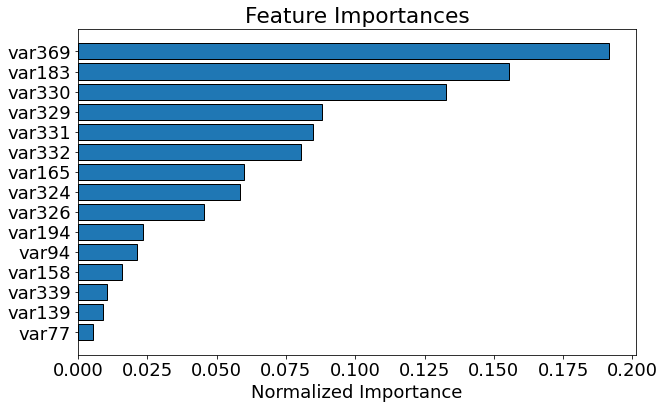

In [38]:
norm_feature_importances = plot_feature_importances(feature_importances)

## Preparing data for modeling.

In [39]:
train_set.drop(columns=['ID']).describe()

,var169,var101,var324,var106,var225,var341,var97,var33,var369,var342,var158,var194,var96,var25,var94,var339,var77,var165,var329,var331,var170,var330,var159,var139,var332,var138,var64,var183,var24,var326,var172,var264,result
count,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000
mean,5089.149,0.037,5.421,0.071,2828.564,3726.867,0.140,0.043,117859.056,565.339,3.205,40.414,0.211,0.664,0.099,5830.069,0.882,1057.363,1609.343,1098.875,1431.471,921.720,2.221,2.386,1068.486,3.372,0.733,13872.858,0.958,4.397,6521.120,0.075,0.039
std,33215.532,0.400,14.597,0.460,25174.787,26949.715,0.641,0.203,198000.782,7333.902,0.863,47.357,0.799,0.472,0.535,47108.512,0.323,10159.446,12600.842,9838.082,19618.051,10503.209,1.498,1.644,8411.489,1.279,0.442,63937.693,0.201,14.601,38621.793,0.541,0.193
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5163.750,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-2895.720,-128.370,-922.380,0.000,-8.040,0.000,0.000,-476.070,0.000,0.000,-4942.260,0.000,0.000,0.000,0.000,0.000
25%,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,67762.680,0.000,3.000,2.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000
50%,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,106483.290,0.000,3.000,3.000,0.000,1.000,0.000,0.000,1.000,3.000,3.000,3.000,0.000,0.990,3.000,3.000,2.730,3.000,1.000,3.000,1.000,0.000,0.000,0.000,0.000
75%,0.000,0.000,3.000,0.000,0.000,0.000,0.000,0.000,118997.827,0.000,3.000,99.000,0.000,1.000,0.000,0.000,1.000,90.000,90.000,90.000,0.000,12.120,3.000,3.000,83.790,3.000,1.000,240.000,1.000,3.000,0.000,0.000,0.000
max,450000.000,15.000,342.000,12.000,774555.930,450000.000,15.000,1.000,22034738.760,304838.700,18.000,99.000,15.000,1.000,6.000,3004185.600,1.000,619329.150,812137.260,601428.600,1500000.000,1542339.360,18.000,33.000,544365.570,33.000,1.000,3458077.320,1.000,510.000,1500000.000,24.000,1.000


In [40]:
train_set = train_set.reset_index(drop=True)
test_set = test_set.reset_index(drop=True)

In [41]:
train_ids = train_set['ID']
test_ids = test_set['ID']

labels = train_set['result']

X_train = train_set.drop(columns = ['ID', 'result'])
y_train = train_set[['result']]

X_test = test_set.drop(columns = ['ID'])

In [42]:
scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)

In [43]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.2, random_state=42)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((48000, 32), (12000, 32), (48000, 1), (12000, 1))

In [44]:
X_train = X_train.reset_index(drop=True)
X_valid = X_valid.reset_index(drop=True)

y_train = y_train.reset_index(drop=True)
y_valid = y_valid.reset_index(drop=True)

### Grid Search to find best params

In [45]:
parameters = {'n_estimators':[50,100,150,200], 'max_depth':[2,5,7]}
forest = RandomForestClassifier()
clf = GridSearchCV(estimator=forest, param_grid=parameters, cv=5)


In [46]:
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 5, 7],
                         'n_estimators': [50, 100, 150, 200]})

In [47]:
clf.best_params_

{'max_depth': 7, 'n_estimators': 50}

In [48]:
clf.best_score_

0.96075

### Baseline model validation test

In [49]:
clf_forest = RandomForestClassifier(n_estimators=50, max_depth=2)
clf_forest.fit(X_train, y_train)

valid_pred = clf_forest.predict(X_valid)

In [50]:
print(classification_report(y_valid, valid_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     11567
           1       0.00      0.00      0.00       433

    accuracy                           0.96     12000
   macro avg       0.48      0.50      0.49     12000
weighted avg       0.93      0.96      0.95     12000



In [51]:
valid_pred_prob = clf_forest.predict_proba(X_valid)[:, 1]

In [52]:
print("AUC:", roc_auc_score(y_valid, valid_pred_prob))
print("Precision:", precision_score(y_valid, valid_pred))
print("Recall:", recall_score(y_valid, valid_pred))
print("F1 Score:", f1_score(y_valid, valid_pred))

AUC: 0.728275629223935
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


### Sampling required. Positive class is too less.

In [53]:
ros = RandomOverSampler()

X_ros, y_ros = ros.fit_resample(X_train, y_train)

In [54]:
X_train.shape, y_train.shape

((48000, 32), (48000, 1))

In [55]:
X_ros.shape, y_ros.shape

((92230, 32), (92230, 1))

In [56]:
y_ros.result.value_counts(normalize=True)

0   0.500
1   0.500
Name: result, dtype: float64

In [57]:
X_train, X_valid, y_train, y_valid = train_test_split(X_ros, y_ros, test_size = 0.2, random_state=42)

In [58]:
X_train = X_train.reset_index(drop=True)
X_valid = X_valid.reset_index(drop=True)

y_train = y_train.reset_index(drop=True)
y_valid = y_valid.reset_index(drop=True)

In [59]:
clf_forest = RandomForestClassifier(n_estimators=50, max_depth=2)
clf_forest.fit(X_train, y_train)

valid_pred_prob = clf_forest.predict_proba(X_valid)[:, 1]
valid_pred = clf_forest.predict(X_valid)

In [60]:
print(classification_report(y_valid, valid_pred))

              precision    recall  f1-score   support

           0       0.67      0.72      0.70      9226
           1       0.70      0.65      0.68      9220

    accuracy                           0.69     18446
   macro avg       0.69      0.69      0.69     18446
weighted avg       0.69      0.69      0.69     18446



In [61]:
print("AUC:", roc_auc_score(y_valid, valid_pred_prob))
print("Precision:", precision_score(y_valid, valid_pred))
print("Recall:", recall_score(y_valid, valid_pred))
print("F1 Score:", f1_score(y_valid, valid_pred))

AUC: 0.7422740799485374
Precision: 0.7007690515031462
Recall: 0.6522776572668113
F1 Score: 0.6756544208515898


### Test Set Results

In [62]:
pred_test = clf_forest.predict(X_test)

### Validation score interpretation

<AxesSubplot:xlabel='churn_score', ylabel='Density'>

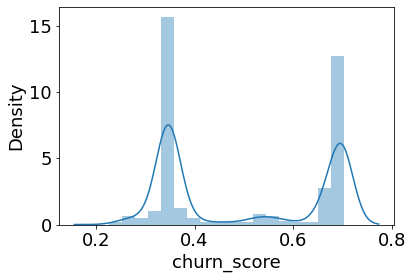

In [63]:
churn_score = pd.DataFrame(valid_pred_prob, columns=['churn_score'])
valid_with_scores = X_valid.join(churn_score)
sns.distplot(valid_with_scores.churn_score)

In [64]:
valid_with_scores = valid_with_scores.join(y_valid)
valid_with_scores['churn_prediction'] = 0
valid_with_scores.loc[valid_with_scores.churn_score > 0.5, 'churn_prediction'] = 1

In [65]:
tn, fp, fn, tp = confusion_matrix(valid_with_scores.result, valid_with_scores.churn_prediction).ravel()
tn, fp, fn, tp

(6658, 2568, 3206, 6014)

In [66]:
fpr = fp / (fp+tn)
fpr

0.2783438109690006

In [67]:
tpr = tp / (tp+fn)
tpr

0.6522776572668113

### Preparing test dataframe

In [68]:
test_results = pd.DataFrame(pred_test, columns=['Result'])

In [69]:
len(test_ids)

16020

In [70]:
len(test_results)

16020

In [71]:
test_results['Id'] = test_ids

In [72]:
test_results.Result.value_counts(normalize=True)

1   0.578
0   0.422
Name: Result, dtype: float64

In [73]:
test_results.head()

,Result,Id
0,1,119773
1,0,119774
2,1,119775
3,0,119777
4,1,119779


In [74]:
test_results.to_csv('submission.csv')

## Insights

In [75]:
train_features.shape

(60000, 23)

In [76]:
IV[IV.VAR_NAME.isin(train_features.columns)].sort_values('IV', ascending=False).head(10)

,VAR_NAME,IV
258,var331,0.469
259,var332,0.452
73,var165,0.451
257,var330,0.433
105,var194,0.271
93,var183,0.234
255,var329,0.208
81,var172,0.095
43,var138,0.089
299,var369,0.084


In [77]:
top_features = ['var64', 'var331', 'var332', 'var165', 'var330', 'var25']

In [78]:
woe_scores[woe_scores.VAR_NAME.isin(top_features)].sort_values('WOE', ascending=False).head()

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
122,var64,0.000,0.000,15991,1358,0.085,14633,0.915,0.586,0.254,0.837,0.474
633,var331,-922.380,2.190,20001,1516,0.076,18485,0.924,0.654,0.320,0.713,0.469
314,var165,-2895.720,0.000,20258,1506,0.074,18752,0.926,0.650,0.325,0.692,0.451
48,var25,0.000,0.000,20164,1492,0.074,18672,0.926,0.644,0.324,0.687,0.425
636,var332,-476.070,2.040,20543,1518,0.074,19025,0.926,0.655,0.330,0.686,0.452


> Features [var64, var331, var165, var25, var332] show are very prominent features with high predictive power.

> Features [var64] - shows strong strong churn rates when its value is 0.

> Features [var331] - shows strong strong churn rates when its value is between -922.380 and 2.19.

> Features [var165] - shows strong strong churn rates when its value is between -2895.720 and 0.

> Features [var25] - shows strong strong churn rates when its value is 0.

> Features [var332] - shows strong strong churn rates when its value is between -476.070 and 2.04.